<center> DBMS - Exploratory Analysis </center>

Source: https://www.kaggle.com/datasets/ravivarmaodugu/databases-dbms-2024/data <br>
The DB-Engines Ranking ranks database management systems according to their popularity. The ranking is updated monthly. <br>

The Databases_DBMS_2024 dataset provides information about leading databases with a worldwide footprint. The original dataframe was obtained from the DB-Engines website: https://db-engines.com/en/ <br>


Date of collect of this datasource: April, 23, 2024.


1. Loading the libraries into the environment:

In [1]:
import numpy as np                             ## Used to calculates math formulas over the data
import pandas as pd                            ## Used for data analysis and manipulation
import matplotlib.pyplot as plt                       ## Used to created visualizations.
import seaborn as sns                          ## Used to draw informative statistical graphics.
import platform                                ## Used to access underlying platform's identifying data.
from textwrap import wrap                      ## Used to modify strings / column names 
from scipy.spatial.distance import pdist
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

2. Detailing the version's used:



In [2]:
print("Numpy - ", np.__version__)
print("Pandas - ", pd.__version__)
print("Seaborn - ", sns.__version__)
print("Plataform - ", platform.__version__)
print("Python - ", platform.python_version())

Numpy -  1.26.4
Pandas -  2.2.1
Seaborn -  0.13.2
Plataform -  1.0.8
Python -  3.12.1


3. Loading the dataset into the environment.

In [3]:
df = pd.read_csv("Databases_DBMS_2024.csv", encoding='latin-1')


In [4]:
pd.set_option('display.max_columns', None)
df.head(5)

,Sno,DBMS,Vendor_Name,Vendor_Country,DBMS_Type,Multi_model_capability,Score_Feb_2024,Score_Jan_2024,Score_Feb_2023,Rank_Feb_2024,Rank_Jan_2024,Rank_Feb_2023
0,1,Oracle,Oracle Corporation,United States,Relational,Yes,1241.45,-6.05,-6.08,1,1.0,1.0
1,2,MySQL,Oracle Corporation,United States,Relational,Yes,1106.67,-16.79,-88.78,2,2.0,2.0
2,3,Microsoft SQL Server,Microsoft Corporation,United States,Relational,Yes,853.57,-23.03,-75.52,3,3.0,3.0
3,4,PostgreSQL,PostgreSQL Global Development Group,United States,Relational,Yes,629.41,-19.55,12.9,4,4.0,4.0
4,5,MongoDB,"MongoDB, Inc.",United States,Document,Yes,420.36,2.88,-32.41,5,5.0,5.0


4. Variable Analysis: <br>

**Sno** - Identifier for all entries (index). Only used to count. <br>
**DBMS** - Categorical value, can be used to count, mode or frequency. <br>
**Vendor_Name** - Categorical value, can be used to count, mode or frequency. <br>
**Vendor_country** - Categorical value, can be used to count, mode or frequency.<br>
**DBMS_Type** - Categorical value, can be used to count, mode or frequency. <br>
**Multi_model_capability** - Binary/Categorical value, with the options - Yes or No. Can be used to count, mode or frequency. <br>
**Score_feb_2024** - Numeric value, can be used with mean, std, min, max, frequency, mode, etc. <br>
**Score_Jan_2023** - Numeric value, can be used with mean, std, min, max, frequency, mode, etc. <br>
**Score_feb_2023** - Numeric value, can be used with mean, std, min, max, frequency, mode, etc. <br>
**Rank_Feb_2024** - Ordered variable, only used to count. <br>
**Rank_Jan_2024** - Ordered variable, only used to count. <br>
**Rank_Feb_2023** - Ordered variable, only used to count. <br>

5. Exploring the datasets / Stastistical overview

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sno                     417 non-null    int64  
 1   DBMS                    417 non-null    object 
 2   Vendor_Name             417 non-null    object 
 3   Vendor_Country          417 non-null    object 
 4   DBMS_Type               417 non-null    object 
 5   Multi_model_capability  417 non-null    object 
 6   Score_Feb_2024          417 non-null    float64
 7   Score_Jan_2024          403 non-null    object 
 8   Score_Feb_2023          389 non-null    object 
 9   Rank_Feb_2024           417 non-null    int64  
 10  Rank_Jan_2024           416 non-null    float64
 11  Rank_Feb_2023           399 non-null    float64
dtypes: float64(3), int64(2), object(7)
memory usage: 39.2+ KB


After this print, it is possible to see that the column 9 - **Rank_Feb_2024** is defined with int64 type, different from similar column 10 - **Rank_Jan_2024** and column 11 - **Rank_Feb_2023** <br>

In this case, change the type of column 9 to float so it will be at the same type.

In [6]:
df = df.astype({"Rank_Feb_2024": float})

In [7]:
df['Rank_Feb_2024'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 417 entries, 0 to 416
Series name: Rank_Feb_2024
Non-Null Count  Dtype  
--------------  -----  
417 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


The values for Score_Jan_2024 and Score_Feb_2023 are defined as "object" based on the output for df.info() command. But, based on the df.head(5), we can confirm the values are numeric. Let's take a look if we could see the issue:

In [8]:
df['Score_Jan_2024'].unique()

array(['-6.05', '-16.79', '-23.03', '-19.55', '2.88', '1.33', '-0.33',
       '-0.18', '1.53', '2.08', '-4.5', '-1.77', '-2', '-1.07', '1.96',
       '-1.51', '-3.62', '-1.15', '0.15', '-1.94', '-1.56', '-1.57',
       '-1.22', '-0.53', '-0.09', '0.09', '-1.48', '0.92', '-0.78',
       '-1.27', '-2.07', '0.42', '0.12', '-0.71', '0.71', '0.63', '-0.66',
       '-0.29', '-0.74', '0.88', '0.57', '-0.1', '-0.7', '-0.45', '-0.77',
       '-0.27', '-0.25', '0.18', '-0.42', '-0.34', '0.04', '0.3', '-0.13',
       '-0.15', '-0.65', '0.33', '0.22', '0.02', '-0.03', '-0.11',
       '-0.01', '-0.22', '0.37', '0.23', '0.29', '-0.41', '0.5', '0.11',
       '0.13', '-0.07', '-0.28', '0.01', '-0.62', '-0.02', '-0.4', '1.44',
       '0.14', '-0.19', '0.08', '-0.14', '-0.55', '-0.59', '0.16',
       '-0.39', '0.24', '-0.21', '-0.12', '0.06', nan, '-0.05', '-0.04',
       '0.1', '-0.06', '-0.2', '-0.26', '0.05', '-0.24', '0.07', '-0.16',
       '-0.08', '-0.35', '0.03', '-0.23', '-0.17', '-0.3', '0.17',

The df.unique() command prompt to use that there are something strange. There are some values with the chracter ±. It is not an error, it is the caracterisct of the values. This value is calculated based on the previous month and current month value. In that case, let's replace the ±0.00 to 0.00 <br>

I created a function called changetype


In [9]:
def changetype(df, column):
    df[column] = df[column].replace(to_replace='±', value='', regex=True).astype(float).round(2)

In [10]:
changetype(df, 'Score_Jan_2024')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sno                     417 non-null    int64  
 1   DBMS                    417 non-null    object 
 2   Vendor_Name             417 non-null    object 
 3   Vendor_Country          417 non-null    object 
 4   DBMS_Type               417 non-null    object 
 5   Multi_model_capability  417 non-null    object 
 6   Score_Feb_2024          417 non-null    float64
 7   Score_Jan_2024          403 non-null    float64
 8   Score_Feb_2023          389 non-null    object 
 9   Rank_Feb_2024           417 non-null    float64
 10  Rank_Jan_2024           416 non-null    float64
 11  Rank_Feb_2023           399 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 39.2+ KB


Doing the same thing with the Score_Feb_2023 column:


In [12]:
df['Score_Feb_2023'].unique()

array(['-6.08', '-88.78', '-75.52', '12.9', '-32.41', '-13.12', '-2.86',
       '-10.74', '11.8', '-15.38', '-17.86', '-6.95', '0.42', '4.57',
       '3.21', '0.81', '16.58', '-6.31', '11.17', '-11.79', '-2.32',
       '-8.82', '-4.45', '-1.28', '-3.71', '-4.46', '-4.52', '-0.96',
       '-3.93', '3.23', '2.33', '0.69', '-0.9', '-4.38', '-2.75', '0.05',
       '2.69', '-2.14', '-2.77', '4.34', nan, '0.01', '-0.78', '-1.77',
       '-4.95', '-4.3', '-0.64', '-0.31', '-0.95', '1.55', '0.03', '0.97',
       '-0.93', '-0.37', '-0.28', '-0.56', '-1.32', '-1.35', '0.53',
       '-0.45', '-0.62', '-0.67', '-0.55', '-1.13', '-0.25', '-0.08',
       '-0.14', '-0.26', '1.11', '-0.32', '-0.79', '-1.61', '0.09',
       '0.33', '-1.66', '1.84', '-0.21', '2.53', '0.06', '-1.09', '-0.85',
       '-1.54', '-1.75', '1.21', '1.16', '-0.27', '-0.76', '-0.89',
       '-0.23', '-0.04', '0.94', '-1.11', '2.08', '-1.01', '0.84', '1.49',
       '-0.33', '0.08', '-1.24', '0.21', '0.2', '-0.63', '-0.05', '-0.42

In [13]:
changetype(df, 'Score_Feb_2023')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sno                     417 non-null    int64  
 1   DBMS                    417 non-null    object 
 2   Vendor_Name             417 non-null    object 
 3   Vendor_Country          417 non-null    object 
 4   DBMS_Type               417 non-null    object 
 5   Multi_model_capability  417 non-null    object 
 6   Score_Feb_2024          417 non-null    float64
 7   Score_Jan_2024          403 non-null    float64
 8   Score_Feb_2023          389 non-null    float64
 9   Rank_Feb_2024           417 non-null    float64
 10  Rank_Jan_2024           416 non-null    float64
 11  Rank_Feb_2023           399 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 39.2+ KB


Now all the columns with numeric values were corrected with corresponding types.

6. Getting more information about the dataframe


In [15]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print("Number of missing values:", sum(df.isna().sum()))

Number of rows: 417
Number of columns: 12
Number of missing values: 61


7. Detailing more about the missing values


In [16]:
df.isnull().sum()

Sno                        0
DBMS                       0
Vendor_Name                0
Vendor_Country             0
DBMS_Type                  0
Multi_model_capability     0
Score_Feb_2024             0
Score_Jan_2024            14
Score_Feb_2023            28
Rank_Feb_2024              0
Rank_Jan_2024              1
Rank_Feb_2023             18
dtype: int64

It is possible to check some missing values at the Columns: Score_Jan_2024, Score_Feb_2023, Rank_Jan_2024,  Rank_Feb_2023. <br>

For the Numeric variables - Score_Jan_2024 and Score_Feb_2023 - NaN values will be replaced by the mean

For that case, I created an function called replacenavalues:

In [17]:
def replacenavalues(df, column):
    df[column] = df[column].fillna(value=df[column].mean())

In [18]:
print("The Value of mean of column Score_Jan_2024 is:", df['Score_Jan_2024'].mean().round(2))

The Value of mean of column Score_Jan_2024 is: -0.28


In [19]:
#Replacing the NaN values with the mean
replacenavalues(df, 'Score_Jan_2024')

In [20]:
df.isnull().sum()

Sno                        0
DBMS                       0
Vendor_Name                0
Vendor_Country             0
DBMS_Type                  0
Multi_model_capability     0
Score_Feb_2024             0
Score_Jan_2024             0
Score_Feb_2023            28
Rank_Feb_2024              0
Rank_Jan_2024              1
Rank_Feb_2023             18
dtype: int64

In [21]:
print("The Value of mean of column Score_Feb_2024 is:", df['Score_Feb_2023'].mean().round(2))

The Value of mean of column Score_Feb_2024 is: -0.79


In [22]:
#Replacing the NaN values with the mean
replacenavalues(df, 'Score_Feb_2023')

In [23]:
df.isnull().sum()

Sno                        0
DBMS                       0
Vendor_Name                0
Vendor_Country             0
DBMS_Type                  0
Multi_model_capability     0
Score_Feb_2024             0
Score_Jan_2024             0
Score_Feb_2023             0
Rank_Feb_2024              0
Rank_Jan_2024              1
Rank_Feb_2023             18
dtype: int64

Reffering to the columns Rank_Jan_2024, Rank_Feb_2023 with NAN values, based on the variable analysis, this type of column can be removed because it will not be useful for the EDA. Next step is to remove them

In [24]:
df.drop(columns=['Rank_Jan_2024','Rank_Feb_2023'], inplace=True)

In [25]:
df.head(10)

,Sno,DBMS,Vendor_Name,Vendor_Country,DBMS_Type,Multi_model_capability,Score_Feb_2024,Score_Jan_2024,Score_Feb_2023,Rank_Feb_2024
0,1,Oracle,Oracle Corporation,United States,Relational,Yes,1241.45,-6.05,-6.08,1.0
1,2,MySQL,Oracle Corporation,United States,Relational,Yes,1106.67,-16.79,-88.78,2.0
2,3,Microsoft SQL Server,Microsoft Corporation,United States,Relational,Yes,853.57,-23.03,-75.52,3.0
3,4,PostgreSQL,PostgreSQL Global Development Group,United States,Relational,Yes,629.41,-19.55,12.90,4.0
4,5,MongoDB,"MongoDB, Inc.",United States,Document,Yes,420.36,2.88,-32.41,5.0
5,6,Redis,Redis Labs,United States,Key-value,Yes,160.71,1.33,-13.12,6.0
6,7,Elasticsearch,Elastic,United States,Search engine,Yes,135.74,-0.33,-2.86,7.0
7,8,IBM Db2,IBM,United States,Relational,Yes,132.23,-0.18,-10.74,8.0
8,9,Snowflake,Snowflake Inc.,United States,Relational,No,127.45,1.53,11.80,9.0
9,10,SQLite,D. Richard Hipp,United States,Relational,No,117.28,2.08,-15.38,10.0


After some data transformation, let's do some evaluation. 
For a company, it is very important during the decision to use a DBMS, understading and verifying if your product needs a specific DBMS_type, if the selected one is scalable, popular in the market, with good support, etc. 

Let's do some analysis by the DBMS Type


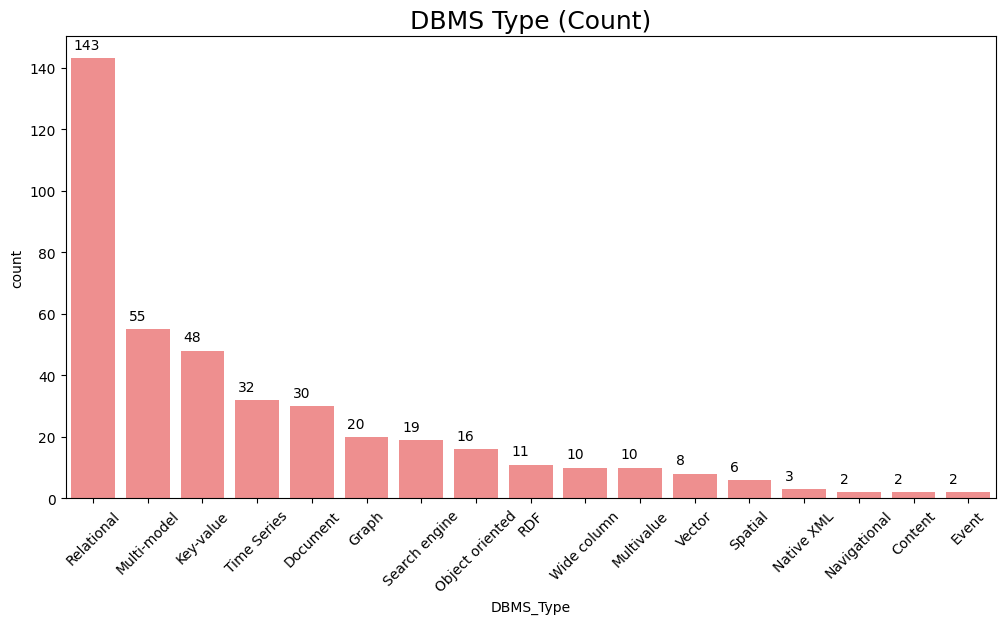

In [26]:
plt.figure(figsize=(12,6))

plt.title("DBMS Type (Count)", color='black', fontsize=18,)
ax = sns.countplot(x='DBMS_Type', data=df, alpha=0.5, order=df['DBMS_Type'].value_counts().index, color='red')

for p in ax.patches: 
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+3)) 
plt.xticks(rotation=45);

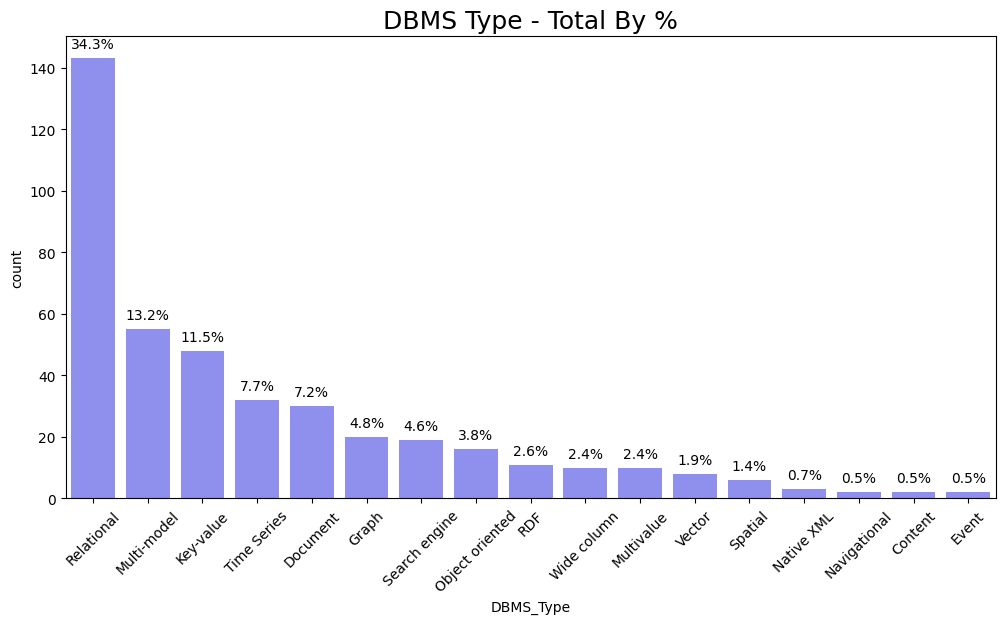

In [27]:
total = float(len(df['DBMS_Type']))

plt.figure(figsize=(12,6))

plt.title("DBMS Type - Total By %", color='black', fontsize=18,)
ax = sns.countplot(x='DBMS_Type', data=df, alpha=0.5, order=df['DBMS_Type'].value_counts().index, color='blue')

for p in ax.patches: 
        height = p.get_height()
        percentage = '{:.1f}%'.format((height/total)*100)
        ax.annotate(percentage, (p.get_x()+p.get_width()/2., height), ha="center", va="bottom", fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.xticks(rotation=45);

We could observe:

- Relational Database is the dominant and it represents 34.3% of the total


How much each country represents in % of the total?

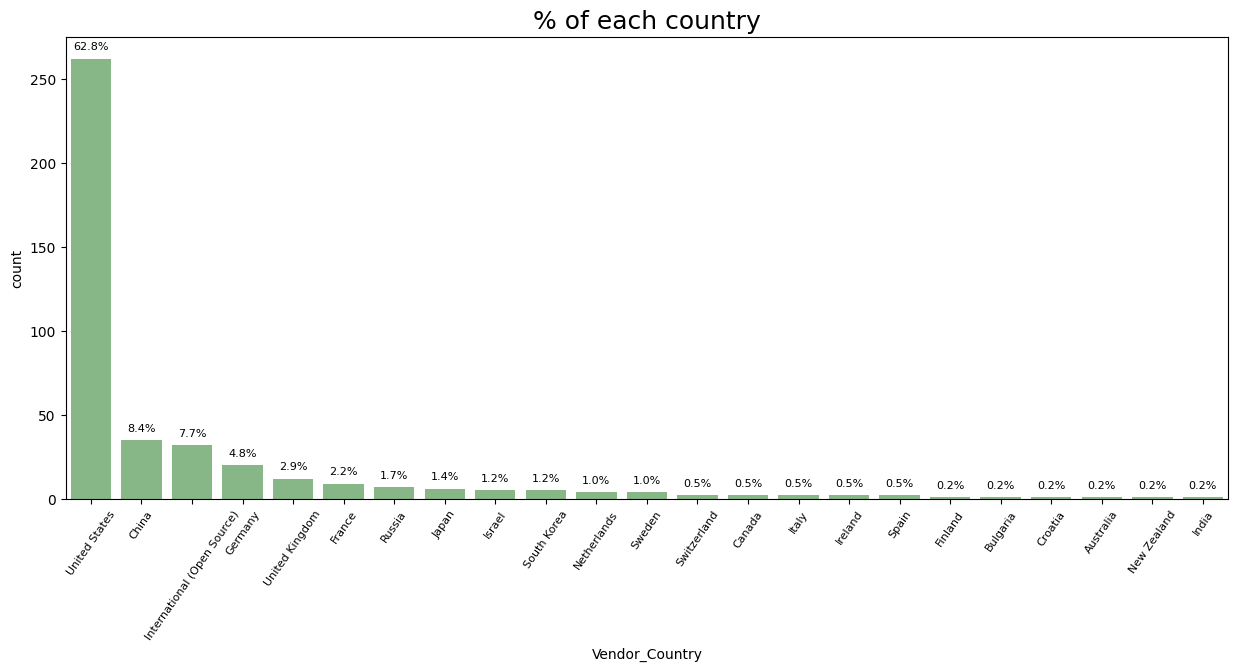

In [28]:
plt.figure(figsize=(15,6))

plt.title("% of each country", color='black', fontsize=18,)
ax = sns.countplot(x='Vendor_Country', data=df, alpha=0.5, order=df['Vendor_Country'].value_counts().index, color='green')

for p in ax.patches: 
        height = p.get_height()
        percentage = '{:.1f}%'.format((height/total)*100)
        ax.annotate(percentage, (p.get_x()+p.get_width()/2., height), ha="center", va="bottom", fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

#Labels in X axis will have an enter in every space
df['Vendor_Country'] = ['\n'.join(wrap(x, 14)) for x in  df['Vendor_Country']]
plt.xticks(rotation=55, fontsize=8);


US dominates the world of DBMS - more than 60% of the DBMS are original from US.

Now with the image of these two graphs, it is possible to see US as the main country related to DBMS. Lets deep dive in there!.-- The Score of 


-- Which is the most used DBMS type in US? <br>
-- Which is the most popular vendor in US? <br>

To discover which is the most used DBMS type only in US, let's plot another graph.

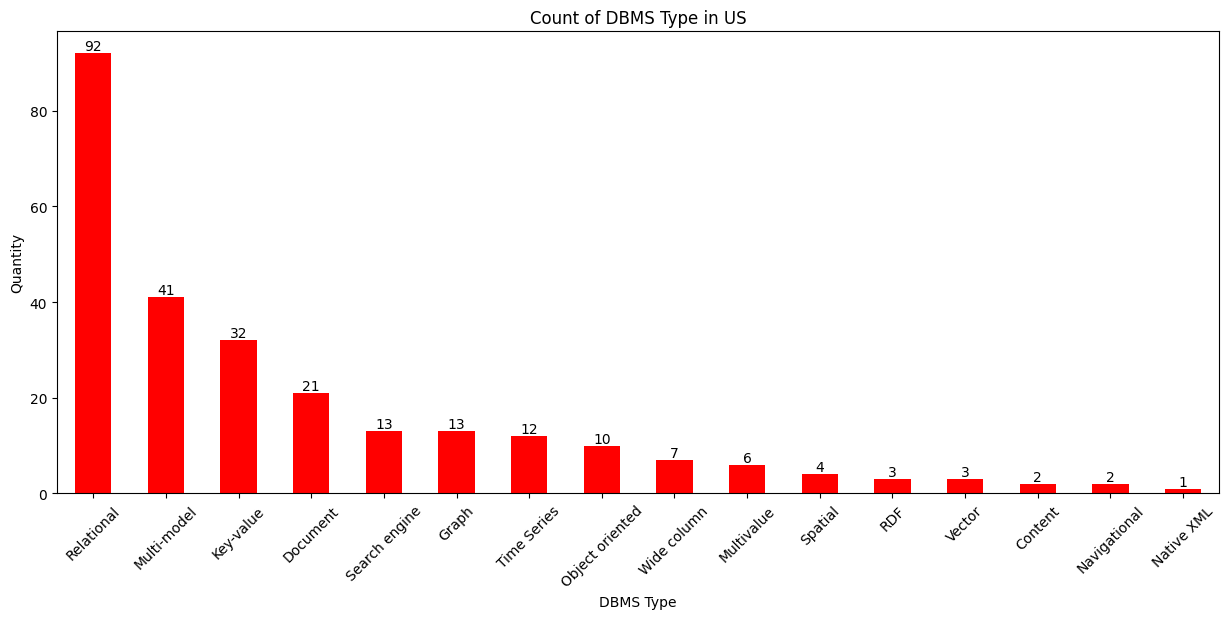

In [29]:
df_us = df[df['Vendor_Country'] == 'United States']
dbms_countsforus = df_us['DBMS_Type'].value_counts()

plt.figure(figsize=(15,6))
dbms_countsforus.plot(kind='bar', color='red')
plt.title('Count of DBMS Type in US')
plt.xlabel('DBMS Type')
plt.ylabel('Quantity')
plt.xticks(rotation=45)

for index, value in enumerate(dbms_countsforus):
    plt.annotate(str(value), xy=(index, value), ha='center', va='bottom')

plt.show();

To discover which is the most popular vendor in US, let's do some evalutaion:

In [30]:
vendorsinus = pd.DataFrame(df_us['Vendor_Name'].value_counts()) 
print("Quantity of usage of the most popular vendor in US:", vendorsinus.iloc[0, 0])

Quantity of usage of the most popular vendor in US: 23


Another evaluation is to check the % of DBMS model in US

In [31]:
modeltype = df_us['Multi_model_capability'].value_counts()

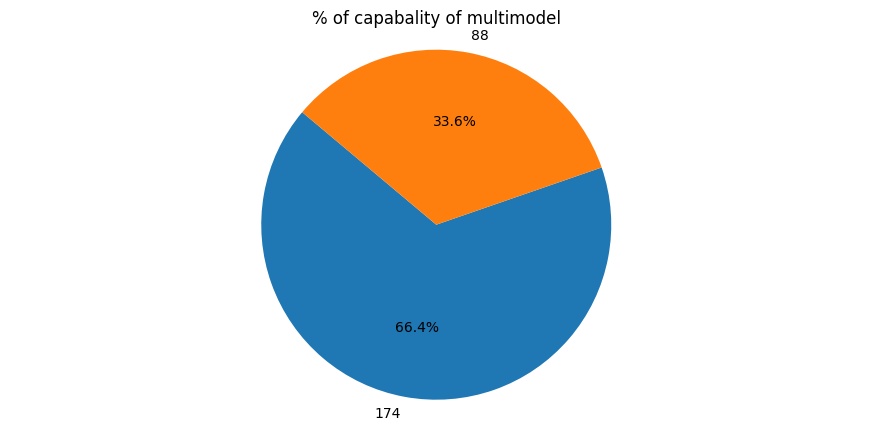

In [32]:

plt.figure(figsize=(11,5))
plt.pie(modeltype, labels=modeltype, autopct=lambda pct: '{:.1f}%'.format(pct), startangle=140)
plt.title("% of capabality of multimodel")
plt.axis('equal')
plt.show()

Machine Learning - Clustering with Euclidian 


The first thing is to choose the metric values from the dataframe. I created a new one called scorepoints only with Score_Feb_2024 and Score_Jan_2024


In [34]:
scorepoints = df[['Score_Feb_2024','Score_Jan_2024']]

Applying the euclidian distribution to the scorepoints

In [35]:
dist_euclidiana = pdist(scorepoints, metric='euclidean')

Now it is the plot of the Dendogram:

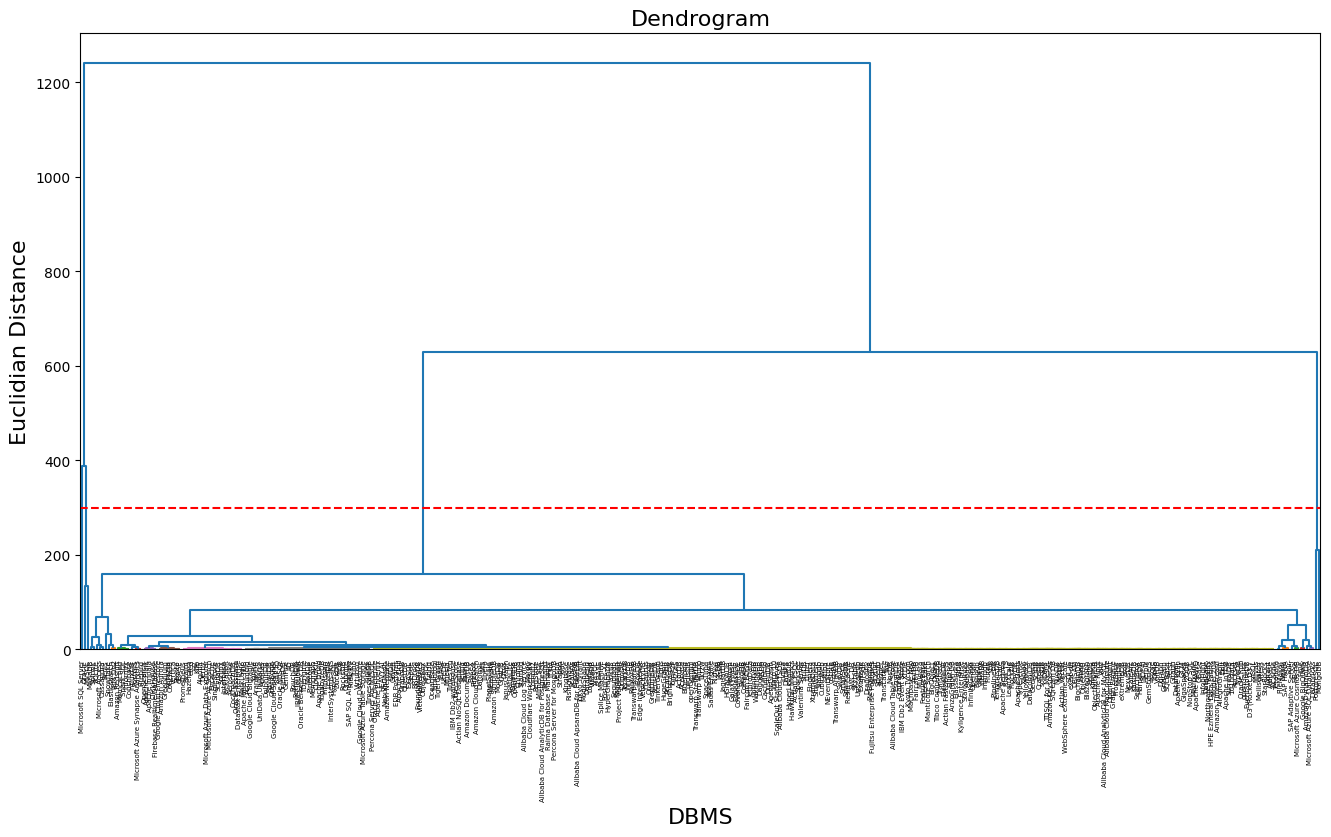

In [47]:
plt.figure(figsize=(16,8))
dend_disteuclid = sch.linkage(scorepoints, method = 'complete', metric = 'euclidean')
den_diseucluds = sch.dendrogram(dend_disteuclid, color_threshold = 4.5, labels = list(df.DBMS))
plt.title('Dendrogram', fontsize=16)
plt.xlabel('DBMS', fontsize=16)
plt.ylabel('Euclidian Distance', fontsize=16)
plt.axhline(y = 300, color = 'red', linestyle = '--')
plt.show()


With the below graph, we could see 3 clusters created above the red line

Now, I'm adding the new "cluster" variable in the original dataframe.

In [58]:
clusters_sing = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'complete')
indicating_cluster_sing = clusters_sing.fit_predict(scorepoints)
df['cluster_complete'] = indicating_cluster_sing
df['cluster_complete'] = df['cluster_complete'].astype('category')

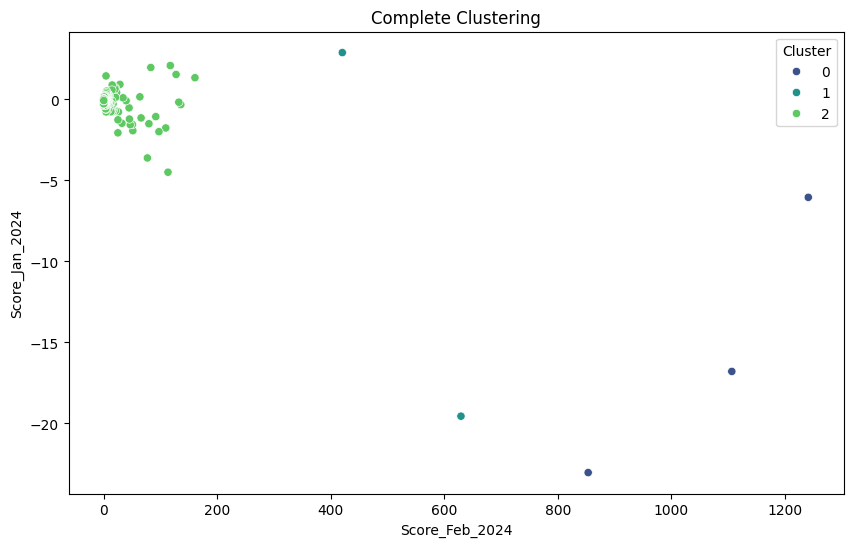

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Score_Feb_2024', y='Score_Jan_2024', hue='cluster_complete', palette='viridis')
plt.title('Complete Clustering')
plt.xlabel('Score_Feb_2024')
plt.ylabel('Score_Jan_2024')
plt.legend(title='Cluster')
plt.show()

With the previous image, we can see the scatter plot distribution of the clusters.

Creating a variable to plot the quantity of observations by cluster.

In [60]:
cluster_complete_column = df['cluster_complete'].value_counts()

Barplot


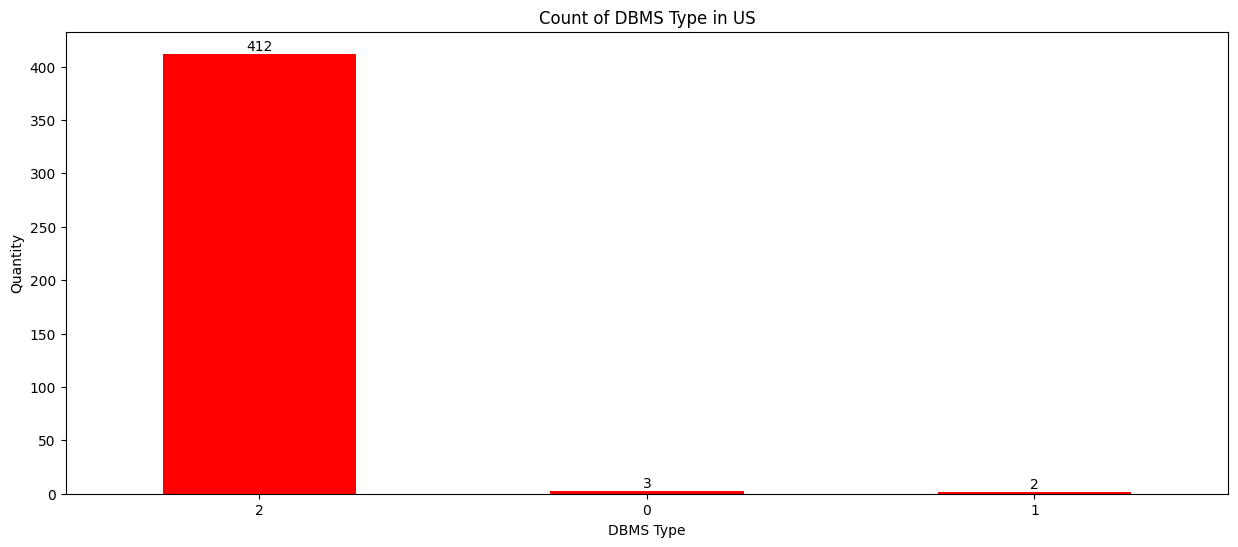

In [61]:
plt.figure(figsize=(15,6))
cluster_complete_column.plot(kind='bar', color='red')
plt.title('Count of DBMS Type in US')
plt.xlabel('DBMS Type')
plt.ylabel('Quantity')
plt.xticks(rotation=360)

for index, value in enumerate(cluster_complete_column):
    plt.annotate(str(value), xy=(index, value), ha='center', va='bottom')

plt.show();

Pie Plot

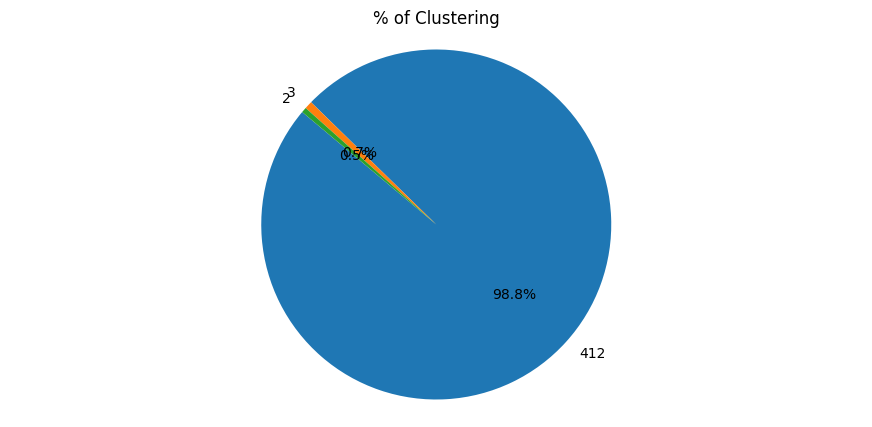

In [62]:
plt.figure(figsize=(11,5))
plt.pie(cluster_complete_column, labels=cluster_complete_column, autopct=lambda pct: '{:.1f}%'.format(pct), startangle=140)
plt.title("% of Clustering")
plt.axis('equal')
plt.show()